1 . Utilizando a base disponivel em: https://www.kaggle.com/c/titanic/data elabore uma solucao
utilizando dois algoritmos de aprendizagem de maquina do seu conhecimento para classificar se o
passageiro tem o nao chance de sobreviver. Os resultados dessa questao deverao ser descritos
detalhadamente no relatorio atraves de tres pontos principais:

• Analise da base de dados: identificar instancias com atributos incompletos, gerar matriz de
correlacao, identificar a presenca de outliers e verificar se as classes estao balanceadas. O
balanceamento devera ser ilustrado por meio de graficos (e.g. histograma);

• Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta
os resultados obtidos em ambos. Explique porque voce acredita que os algoritmos
escolhidos sao mais apropriados para o problema;

• Analise os resultados considerando matriz de confusao, especificidade, sensibilidade,
medida f1 e acuracia. Descreva detalhadamente os resultados obtidos por cada metrica,
justificando a diferenca entre eles.
Dicas:

• A partir da analise da base de dados, para bons resultados possivelmente sera necessario
pre-processar os dados. Para identificar os outliers, recomenda-se ilustra-los graficamente
(e.g. boxplot).

• Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%, respectivamente.

• Para analisar os resultados de cada metrica, identifique os falsos positivos, falsos
negativos, verdadeiros positivos e verdadeiros negativos.
Bonus: Altere dois parametros de cada algoritmo de aprendizagem de maquina utilizados
na questao e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e a
funcao de distancia utilizada, alterar a funcao kernel do SVM, alterar a arquitetura da rede
neural (e.x. camadas e funcao de ativacao, alterar o otimizador e a taxa de aprendizado)

# Questão 1

### 1.Pré-processamento dos dados

In [1]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
#Abrindo as bases
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 30
pd.options.display.max_rows = 891

20 60


In [2]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Somando as colunas respectivas a numero de familiares

In [6]:
dataset_train['Size_family'] = dataset_train['SibSp'] + dataset_train['Parch']
dataset_train.head(1)
dataset_test['Size_family'] = dataset_test['SibSp'] + dataset_test['Parch']
#dataset_train.head(1)

### Transformando as linhas de ticket com letras em inteiros

In [7]:
dataset_train['Ticket'] = pd.to_numeric(dataset_train['Ticket'], errors='coerce')
dataset_train['Ticket'] = dataset_train['Ticket'].replace(np.nan, 0)
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Size_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0.0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0.0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0.0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,0


In [8]:
dataset_test['Ticket'] = pd.to_numeric(dataset_test['Ticket'], errors='coerce')
dataset_test['Ticket'] = dataset_test['Ticket'].replace(np.nan, 0)
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Size_family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911.0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272.0,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276.0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154.0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298.0,12.2875,NaN,S,2


### Verificando se existem instancias nulas

In [9]:
dataset_train.isnull().values.any()
dataset_test.isnull().values.any()

True

In [10]:
dataset_test.iloc[:,7].isnull().values.any()

False

In [11]:
dataset_train.iloc[:,8].isnull().values.any()

False

### Obtendo a moda de Age e Fare

In [12]:
#moda idade teste
dataset_train.iloc[:,5].mode()

0    24.0
dtype: float64

In [13]:
#moda idade treino
dataset_test.iloc[:,4].mode()

0    21.0
1    24.0
dtype: float64

In [14]:
#moda fare teste
dataset_test.iloc[:,8].mode()

0    7.75
dtype: float64

In [15]:
#moda embarque teste
dataset_train.iloc[:,11].mode()

0    S
dtype: object

### Substituindo valores nulos na coluna idade pela moda

In [16]:
dataset_train['Age'] = dataset_train['Age'].replace(np.nan, 24)
dataset_test['Age'] = dataset_test['Age'].replace(np.nan, 24)

### Substituindo valores nulos na coluna Fare pela moda

In [17]:
dataset_test['Fare'] = dataset_test['Fare'].replace(np.nan, 7.75)

### Substituindo valores nulos na coluna Embarked

In [18]:
dataset_train['Embarked'] = dataset_train['Embarked'].replace(np.nan, 'S')

### Excluindo as colunas Name, Cabin e PassengerId

In [19]:
dataset_train = dataset_train.drop(['Name', 'Cabin', 'PassengerId','SibSp','Parch'], axis=1)
dataset_test = dataset_test.drop(['Name', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)
dataset_train.head(1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Size_family
0,0,3,male,22.0,0.0,7.25,S,1


### One hot enconding

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#base treino
le_train_sex = LabelEncoder()
le_train_embarked = LabelEncoder()
le_train_class = LabelEncoder()
dataset_train['sex_encoded'] = le_train_sex.fit_transform(dataset_train.iloc[:,2].astype(str))
dataset_train['embarked_encoded'] = le_train_embarked.fit_transform(dataset_train.iloc[:,6].astype(str))
dataset_train['class_encoded'] = le_train_class.fit_transform(dataset_train.iloc[:,1].astype(str))

sex_ohe_train = OneHotEncoder(categories='auto')
emb_ohe_train = OneHotEncoder(categories='auto')
class_ohe_train = OneHotEncoder(categories='auto')
X_sex_train = sex_ohe_train.fit_transform(dataset_train.sex_encoded.values.reshape(-1,1)).toarray()
X_emb_train = emb_ohe_train.fit_transform(dataset_train.embarked_encoded.values.reshape(-1,1)).toarray()
X_class_train = class_ohe_train.fit_transform(dataset_train.class_encoded.values.reshape(-1,1)).toarray()


dataset_ohe_train = pd.DataFrame(X_sex_train, columns = ["sex"+str(int(i)) for i in range(X_sex_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)
dataset_ohe_train = pd.DataFrame(X_emb_train, columns = ["Embark"+str(int(i)) for i in range(X_emb_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)
dataset_ohe_train = pd.DataFrame(X_class_train, columns = ["Class"+str(int(i)) for i in range(X_class_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)

dataset_train = dataset_train.loc[:,~dataset_train.columns.duplicated()]
#dataset_train

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#base test
le_test_sex = LabelEncoder()
le_test_embarked = LabelEncoder()
le_test_class = LabelEncoder()
dataset_test['sex_encoded'] = le_test_sex.fit_transform(dataset_test.iloc[:,1].astype(str))
dataset_test['embarked_encoded'] = le_test_embarked.fit_transform(dataset_test.iloc[:,5].astype(str))
dataset_test['class_encoded'] = le_test_class.fit_transform(dataset_test.iloc[:,0].astype(str))


sex_ohe_test = OneHotEncoder(categories='auto')
emb_ohe_test = OneHotEncoder(categories='auto')
class_ohe_test = OneHotEncoder(categories='auto')
X_sex_test = sex_ohe_test.fit_transform(dataset_test.sex_encoded.values.reshape(-1,1)).toarray()
X_emb_test = emb_ohe_test.fit_transform(dataset_test.embarked_encoded.values.reshape(-1,1)).toarray()
X_class_test = class_ohe_test.fit_transform(dataset_test.class_encoded.values.reshape(-1,1)).toarray()


dataset_ohe_test = pd.DataFrame(X_sex_test, columns = ["sex"+str(int(i)) for i in range(X_sex_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)
dataset_ohe_test = pd.DataFrame(X_emb_test, columns = ["Embark"+str(int(i)) for i in range(X_emb_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)
dataset_ohe_test = pd.DataFrame(X_class_test, columns = ["Class"+str(int(i)) for i in range(X_class_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)

dataset_test = dataset_test.loc[:,~dataset_test.columns.duplicated()]
#dataset_test

### Excluindo as colunas Sex, Embarked e Pclass

In [22]:
dataset_train.head(1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Size_family,sex_encoded,embarked_encoded,class_encoded,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,0,3,male,22.0,0.0,7.25,S,1,1,2,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
dataset_train = dataset_train.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
dataset_test = dataset_test.drop(['Sex', 'Embarked',  'Pclass'], axis=1)

In [24]:
dataset_train.head(1)

,Survived,Age,Ticket,Fare,Size_family,sex_encoded,embarked_encoded,class_encoded,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,0,22.0,0.0,7.25,1,1,2,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
dataset_test.head(1)

,Age,Ticket,Fare,Size_family,sex_encoded,embarked_encoded,class_encoded,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,34.5,330911.0,7.8292,0,1,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Boxplot base de teste

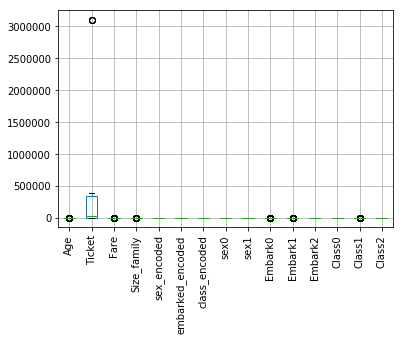

In [26]:
dataset_test.boxplot(rot=90)

### Boxplot base de treino

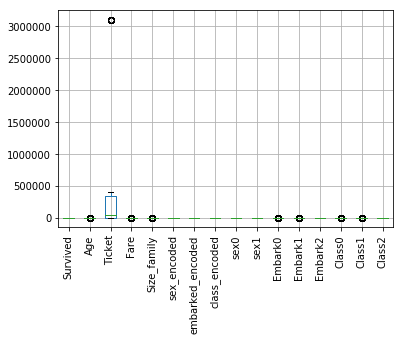

In [27]:
dataset_train.boxplot(rot=90)